# Analistes del Perfil del Client: 
#### Quins són els perfils demogràfics que mostren més propensió a contractar productes financers?

#### LIBRERIAS

In [2]:
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_BANK_marketing = pd.read_parquet('df_BANK_marketing.parquet')
df_BANK_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11163 entries, 0 to 11162
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11163 non-null  int64  
 1   age            11163 non-null  float64
 2   job            11163 non-null  object 
 3   marital        11163 non-null  object 
 4   education      11163 non-null  object 
 5   is_in_default  11163 non-null  int64  
 6   balance        11163 non-null  int64  
 7   housing        11163 non-null  int64  
 8   loan           11163 non-null  int64  
 9   contact        11163 non-null  object 
 10  day            11163 non-null  int64  
 11  month          11163 non-null  object 
 12  duration       11163 non-null  int64  
 13  campaign       11163 non-null  int64  
 14  pdays          11163 non-null  int64  
 15  previous       11163 non-null  int64  
 16  poutcome       11163 non-null  object 
 17  deposit        11163 non-null  int64  
dtypes: flo

In [4]:
df_BANK_marketing

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,2,59.0,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
2,3,56.0,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
3,4,41.0,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
4,5,55.0,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11158,11159,33.0,blue-collar,single,primary,0,1,1,0,cellular,20,apr,257,1,-1,0,unknown,0
11159,11160,39.0,services,married,secondary,0,733,0,0,unknown,16,jun,83,4,-1,0,unknown,0
11160,11161,32.0,technician,single,secondary,0,29,0,0,cellular,19,aug,156,2,-1,0,unknown,0
11161,11162,43.0,technician,married,secondary,0,0,0,1,cellular,8,may,9,2,172,5,failure,0


In [5]:
cliente= df_BANK_marketing[['id', 'age', 'job', 'marital', 'education', 'is_in_default', 'housing', 'loan', 'deposit']]
cliente

,id,age,job,marital,education,is_in_default,housing,loan,deposit
0,1,59.0,admin.,married,secondary,0,1,0,1
1,2,59.0,admin.,married,secondary,0,1,0,1
2,3,56.0,admin.,married,secondary,0,0,0,1
3,4,41.0,technician,married,secondary,0,1,0,1
4,5,55.0,services,married,secondary,0,1,0,1
...,...,...,...,...,...,...,...,...,...
11158,11159,33.0,blue-collar,single,primary,0,1,0,0
11159,11160,39.0,services,married,secondary,0,0,0,0
11160,11161,32.0,technician,single,secondary,0,0,0,0
11161,11162,43.0,technician,married,secondary,0,0,1,0


In [6]:
cliente.to_csv(r'c:\Users\34622\Documents\0_Simulacio_projecte\cliente_sprint1.csv')

In [7]:
cliente[cliente['is_in_default'] == 1]
## existen 168 clientes con creditos en demora

,id,age,job,marital,education,is_in_default,housing,loan,deposit
31,32,32.0,blue-collar,married,secondary,1,1,0,1
115,116,30.0,blue-collar,single,secondary,1,1,0,1
211,212,42.0,technician,single,secondary,1,1,0,1
214,215,44.0,management,divorced,tertiary,1,1,0,1
217,218,40.0,self-employed,married,secondary,1,1,1,1
...,...,...,...,...,...,...,...,...,...
11024,11025,37.0,self-employed,married,secondary,1,1,0,0
11054,11055,34.0,management,single,tertiary,1,0,0,0
11071,11072,31.0,management,single,tertiary,1,1,0,0
11127,11128,35.0,unemployed,married,secondary,1,1,1,0


##### HIPOTECA

In [8]:
hipoteca = cliente[cliente['housing'] == 1]
hipoteca
## existen 5282 clientes que tienen una hipóteca

,id,age,job,marital,education,is_in_default,housing,loan,deposit
0,1,59.0,admin.,married,secondary,0,1,0,1
1,2,59.0,admin.,married,secondary,0,1,0,1
3,4,41.0,technician,married,secondary,0,1,0,1
4,5,55.0,services,married,secondary,0,1,0,1
6,7,42.0,management,single,tertiary,0,1,1,1
...,...,...,...,...,...,...,...,...,...
11153,11154,34.0,housemaid,married,secondary,0,1,0,0
11155,11156,52.0,technician,married,tertiary,0,1,1,0
11156,11157,35.0,blue-collar,married,secondary,0,1,1,0
11157,11158,34.0,blue-collar,single,secondary,0,1,0,0


##### CREDITO

In [9]:
credito = cliente[cliente['loan'] == 1]
credito
## existen 1460 clinetes con un crédito personal

,id,age,job,marital,education,is_in_default,housing,loan,deposit
6,7,42.0,management,single,tertiary,0,1,1,1
7,8,56.0,management,married,tertiary,0,1,1,1
13,14,29.0,management,married,tertiary,0,1,1,1
20,21,49.0,admin.,divorced,secondary,0,1,1,1
41,42,60.0,blue-collar,married,primary,0,1,1,1
...,...,...,...,...,...,...,...,...,...
11144,11145,38.0,unemployed,divorced,secondary,0,1,1,0
11147,11148,30.0,admin.,married,secondary,1,0,1,0
11155,11156,52.0,technician,married,tertiary,0,1,1,0
11156,11157,35.0,blue-collar,married,secondary,0,1,1,0


##### DEPOSITO

In [10]:
deposito = cliente[cliente['deposit'] == 1]
deposito

,id,age,job,marital,education,is_in_default,housing,loan,deposit
0,1,59.0,admin.,married,secondary,0,1,0,1
1,2,59.0,admin.,married,secondary,0,1,0,1
2,3,56.0,admin.,married,secondary,0,0,0,1
3,4,41.0,technician,married,secondary,0,1,0,1
4,5,55.0,services,married,secondary,0,1,0,1
...,...,...,...,...,...,...,...,...,...
5285,5286,78.0,retired,divorced,primary,0,0,0,1
5286,5287,30.0,management,single,tertiary,0,0,0,1
5287,5288,69.0,retired,divorced,tertiary,0,0,0,1
5288,5289,48.0,entrepreneur,married,secondary,0,0,1,1


##### DEMORA + TODO CONTRATADO

In [11]:
clientes_1 = cliente[(cliente['is_in_default'] == 1)&(cliente['housing'] == 1) & (cliente['loan'] == 1)&(cliente['deposit'] == 1)]
clientes_1
## tenemos 7 clientes con contratados todos los sevicios y con inpagos

,id,age,job,marital,education,is_in_default,housing,loan,deposit
217,218,40.0,self-employed,married,secondary,1,1,1,1
381,382,41.0,blue-collar,single,secondary,1,1,1,1
409,410,38.0,management,married,tertiary,1,1,1,1
1556,1557,45.0,blue-collar,married,primary,1,1,1,1
1848,1849,45.0,admin.,married,secondary,1,1,1,1
4598,4599,33.0,blue-collar,divorced,unknown,1,1,1,1
4660,4661,31.0,entrepreneur,single,tertiary,1,1,1,1


##### NADA CONTRATADO

In [12]:
clientes_nada_contratado = cliente[(cliente['is_in_default'] == 0)&(cliente['housing'] == 0) & (cliente['loan'] == 0)&(cliente['deposit']==0)]
clientes_nada_contratado
## tenemos 2089 clientes sin nada contratado

,id,age,job,marital,education,is_in_default,housing,loan,deposit
5290,5291,57.0,retired,single,primary,0,0,0,0
5294,5295,37.0,entrepreneur,married,tertiary,0,0,0,0
5295,5296,32.0,management,married,tertiary,0,0,0,0
5296,5297,35.0,self-employed,married,secondary,0,0,0,0
5299,5300,52.0,unemployed,married,secondary,0,0,0,0
...,...,...,...,...,...,...,...,...,...
11151,11152,34.0,management,married,secondary,0,0,0,0
11154,11155,43.0,admin.,single,secondary,0,0,0,0
11159,11160,39.0,services,married,secondary,0,0,0,0
11160,11161,32.0,technician,single,secondary,0,0,0,0


#### TODO CONTRATADO CON O SIN DEMORA

In [13]:
clientes_todo_contratado = cliente[(cliente['housing'] == 1) & (cliente['loan'] == 1)&(cliente['deposit'] ==1)]
clientes_todo_contratado
# tenemos 265 clientes que tienen contratado housing, loan y deposit

,id,age,job,marital,education,is_in_default,housing,loan,deposit
6,7,42.0,management,single,tertiary,0,1,1,1
7,8,56.0,management,married,tertiary,0,1,1,1
13,14,29.0,management,married,tertiary,0,1,1,1
20,21,49.0,admin.,divorced,secondary,0,1,1,1
41,42,60.0,blue-collar,married,primary,0,1,1,1
...,...,...,...,...,...,...,...,...,...
5224,5225,51.0,self-employed,married,tertiary,0,1,1,1
5238,5239,24.0,blue-collar,married,secondary,0,1,1,1
5240,5241,39.0,services,married,secondary,0,1,1,1
5254,5255,31.0,blue-collar,married,primary,0,1,1,1


In [14]:
clientes_todo_contratado.sort_values('is_in_default', ascending=False).head(10)

,id,age,job,marital,education,is_in_default,housing,loan,deposit
409,410,38.0,management,married,tertiary,1,1,1,1
4660,4661,31.0,entrepreneur,single,tertiary,1,1,1,1
381,382,41.0,blue-collar,single,secondary,1,1,1,1
1556,1557,45.0,blue-collar,married,primary,1,1,1,1
4598,4599,33.0,blue-collar,divorced,unknown,1,1,1,1
217,218,40.0,self-employed,married,secondary,1,1,1,1
1848,1849,45.0,admin.,married,secondary,1,1,1,1
2333,2334,32.0,services,married,secondary,0,1,1,1
2417,2418,52.0,admin.,married,secondary,0,1,1,1
2385,2386,32.0,admin.,married,secondary,0,1,1,1


## PERFIL CLIENTES CON HIPOTECA

##### VARIABLE EDAD

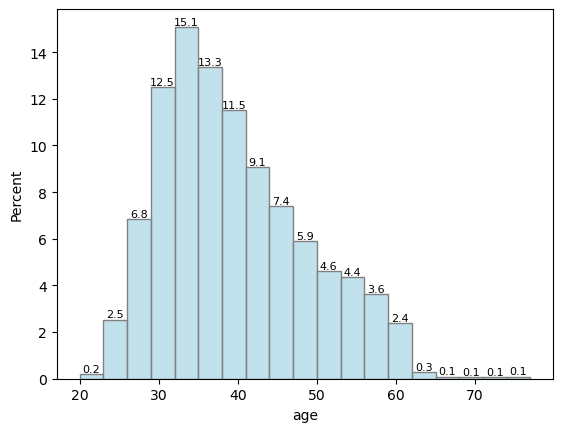

In [15]:
ax =sns.histplot(data=hipoteca, x='age', bins = range(20,80,3), color='lightblue', edgecolor = 'gray', stat = 'percent')
ax.bar_label(ax.containers[0], labels=[f"{v:.1f}" for v in ax.containers[0].datavalues],fontsize = 8);

##### VARIABLE JOB

In [82]:
hipoteca_cuenteo = hipoteca['job'].value_counts()
order = hipoteca_cuenteo.index

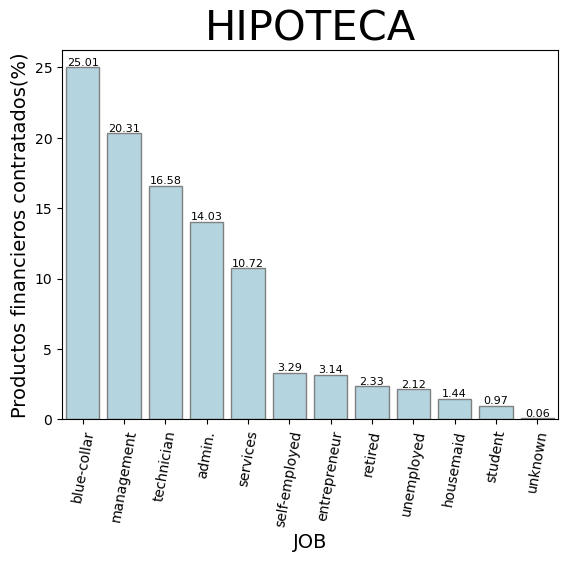

In [ ]:
ax =sns.countplot(data=hipoteca, x='job', order = order, color='lightblue', edgecolor = 'gray', stat = 'percent')
ax.bar_label(ax.containers[0], labels=[f"{v:.2f}" for v in ax.containers[0].datavalues], fontsize = 8)
plt.xticks(rotation = 80)
plt.title('HIPOTECA', fontsize=30)
plt.ylabel('Productos financieros contratados(%)', fontsize=14)
plt.xlabel('JOB', fontsize=14);

##### VARIABLE ESTADO CIVIL

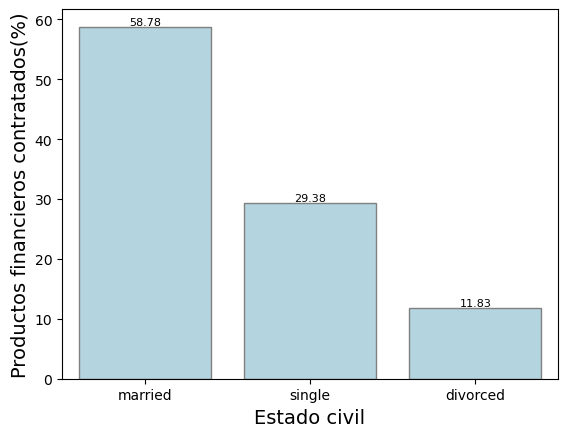

In [87]:
ax =sns.countplot(data=hipoteca, x='marital', color='lightblue', edgecolor = 'gray', stat ='percent')
ax.bar_label(ax.containers[0], labels=[f"{v:.2f}" for v in ax.containers[0].datavalues], fontsize = 8)
plt.ylabel('Productos financieros contratados(%)', fontsize=14)
plt.xlabel('Estado civil', fontsize=14);

In [19]:
estado_civil = hipoteca.groupby(['marital']).housing.count().reset_index()
estado_civil

,marital,housing
0,divorced,625
1,married,3105
2,single,1552


In [20]:
colores = ['skyblue', 'lightgreen', 'pink']

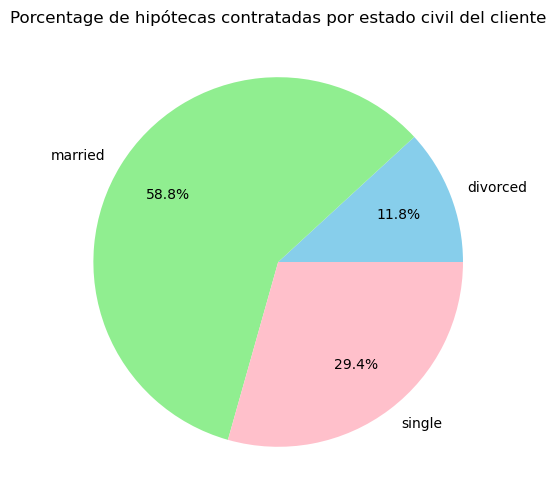

In [21]:
plt.figure(figsize=(6,6))
plt.pie(estado_civil['housing'], labels = estado_civil['marital'], autopct = "%.1f%%", pctdistance=0.7, colors = colores)
plt.title('Porcentage de hipótecas contratadas por estado civil del cliente')
plt.show()

##### VARIABLE EDUCACION

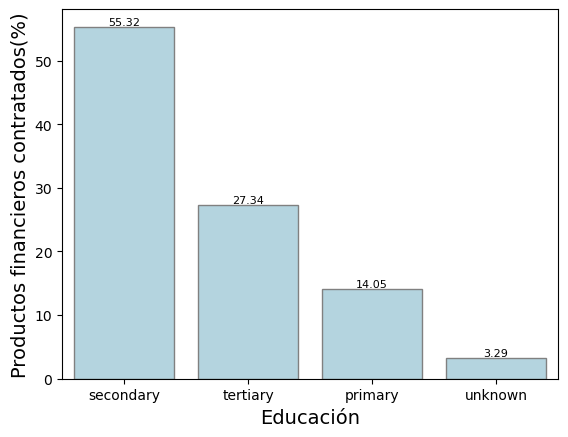

In [88]:
ax =sns.countplot(data=hipoteca, x='education', color='lightblue', edgecolor = 'gray', stat = 'percent')
ax.bar_label(ax.containers[0], labels=[f"{v:.2f}" for v in ax.containers[0].datavalues], fontsize = 8)
plt.ylabel('Productos financieros contratados(%)', fontsize=14)
plt.xlabel('Educación', fontsize=14);

## PERFIL CLIENTES CON TODO CONTRATADO

##### VARIABLE EDAD

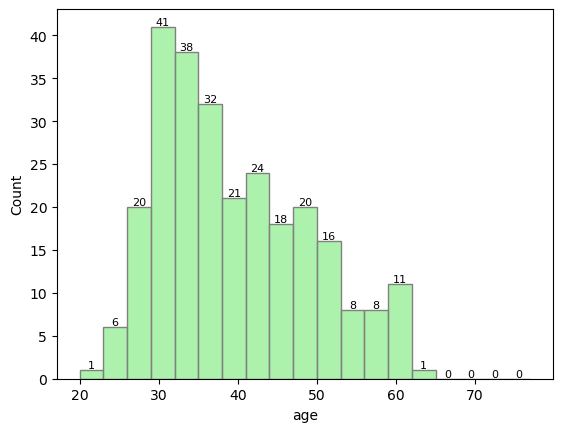

In [23]:
ax =sns.histplot(data=clientes_todo_contratado, x='age', bins = range(20,80,3), color='lightgreen', edgecolor = 'gray')
ax.bar_label(ax.containers[0], fontsize = 8);

##### VARIABLE JOB

In [24]:
clientes_todo_contratado_cuenteo = clientes_todo_contratado['job'].value_counts()
order = clientes_todo_contratado_cuenteo.index

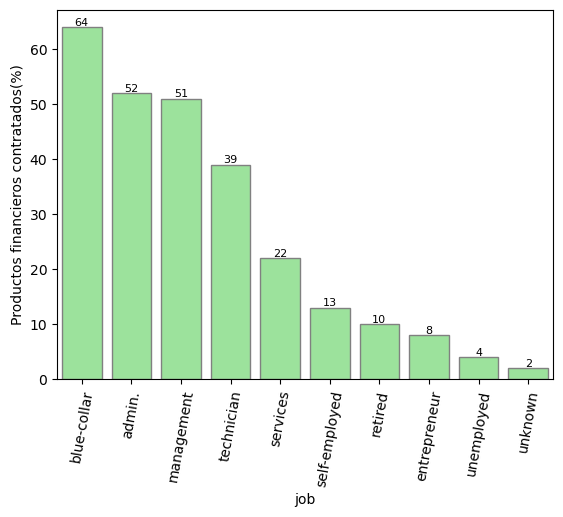

In [25]:
ax =sns.countplot(data=clientes_todo_contratado, x='job', order=order, color='lightgreen', edgecolor = 'gray')
ax.bar_label(ax.containers[0], fontsize = 8)
plt.ylabel('Productos financieros contratados(%)')
plt.xticks(rotation = 80);

##### VARIABLE ESTADO CIVIL

In [56]:
clientes_todo_contratado_cuenteo = clientes_todo_contratado['marital'].value_counts()
order = clientes_todo_contratado_cuenteo.index

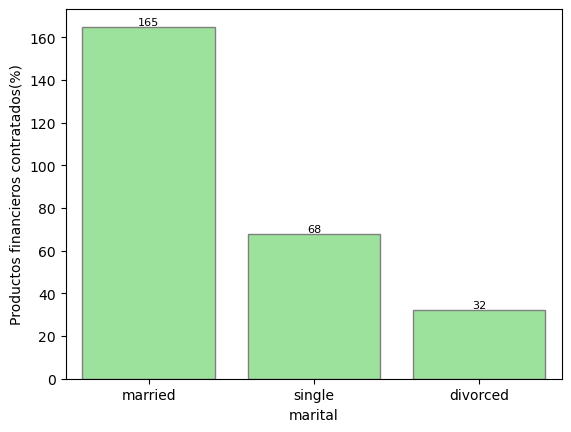

In [57]:
ax =sns.countplot(data=clientes_todo_contratado, x='marital', order = order, color='lightgreen', edgecolor = 'gray')
ax.bar_label(ax.containers[0], fontsize = 8)
plt.ylabel('Productos financieros contratados(%)');

##### VARIABLE EDUCACION

In [59]:
clientes_todo_contratado_cuenteo = clientes_todo_contratado['education'].value_counts()
order = clientes_todo_contratado_cuenteo.index

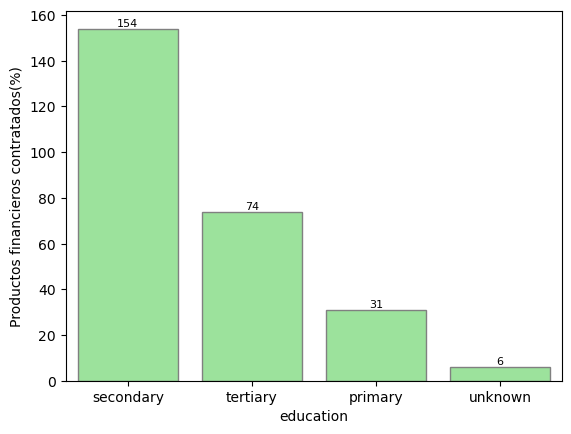

In [60]:
ax =sns.countplot(data=clientes_todo_contratado, x='education', order = order, color='lightgreen', edgecolor = 'gray')
ax.bar_label(ax.containers[0], fontsize = 8)
plt.ylabel('Productos financieros contratados(%)');

## PERFIL CLIENTES CON CREDITO PERSONAL (LOAN)

##### VARIABLE EDAD

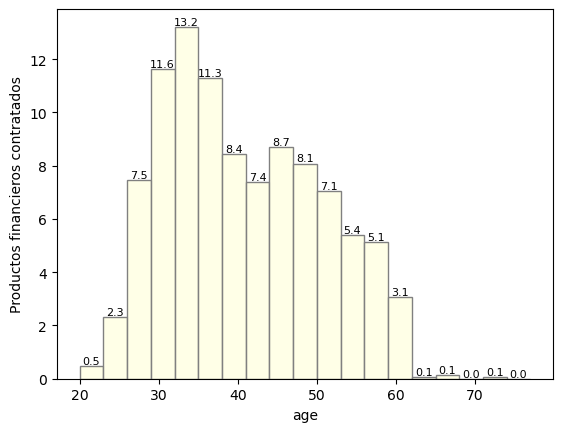

In [65]:
ax =sns.histplot(data=credito, x='age', bins = range(20,80,3), color='LIGHTYELLOW', edgecolor = 'gray', stat = 'percent')
ax.bar_label(ax.containers[0], labels=[f"{v:.1f}" for v in ax.containers[0].datavalues], fontsize = 8)
plt.ylabel('Productos financieros contratados');

##### VARIABLE JOB

In [73]:
credito_cuenteo = credito['job'].value_counts()
order = credito_cuenteo.index

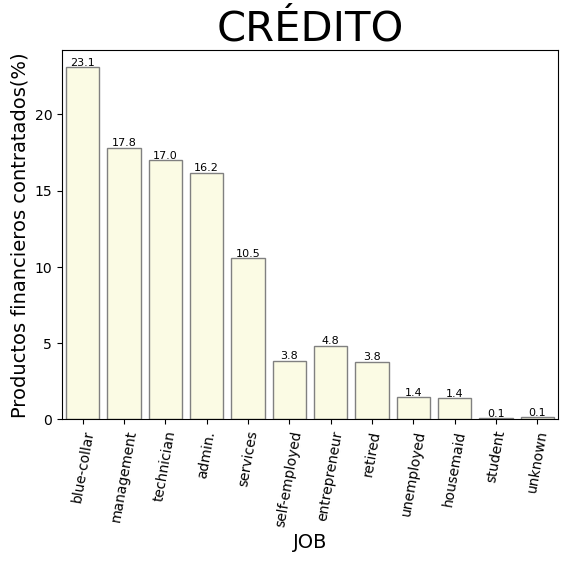

In [89]:
ax =sns.countplot(data=credito, x='job', order=order, color='lightYELLOW', edgecolor = 'gray', stat = 'percent')
ax.bar_label(ax.containers[0], labels=[f"{v:.1f}" for v in ax.containers[0].datavalues], fontsize = 8)
plt.xticks(rotation = 80)
plt.title('CRÉDITO', fontsize=30)
plt.xlabel('JOB', fontsize=14)
plt.ylabel('Productos financieros contratados(%)', fontsize=14);

##### VARIABLE ESTADO CIVIL

In [91]:
credito_cuenteo = credito['marital'].value_counts()
order = credito_cuenteo.index

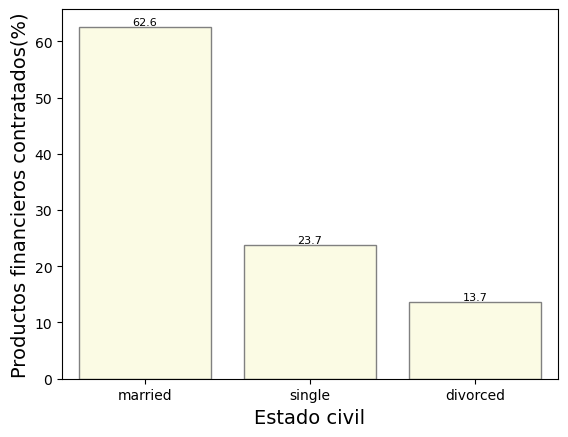

In [92]:
ax =sns.countplot(data=credito, x='marital', order = order, color='lightyellow', edgecolor = 'gray', stat = 'percent')
ax.bar_label(ax.containers[0], labels=[f"{v:.1f}" for v in ax.containers[0].datavalues], fontsize = 8)
plt.ylabel('Productos financieros contratados(%)', fontsize=14)
plt.xlabel('Estado civil', fontsize=14);

##### VARIABLE EDUCACION

In [94]:
credito_cuenteo = credito['education'].value_counts()
order = credito_cuenteo.index

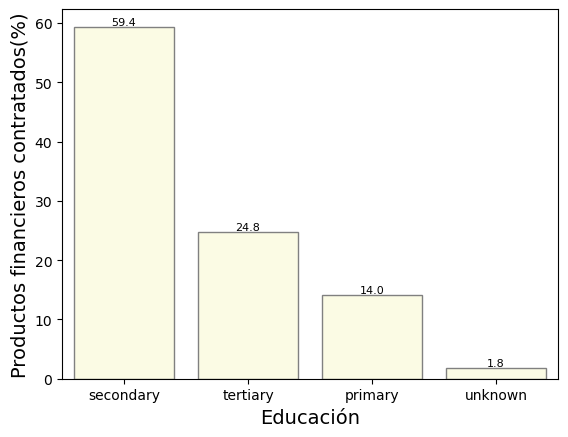

In [95]:
ax =sns.countplot(data=credito, x='education', order=order, color='lightyellow', edgecolor = 'gray', stat = 'percent')
ax.bar_label(ax.containers[0], labels=[f"{v:.1f}" for v in ax.containers[0].datavalues], fontsize = 8)
plt.ylabel('Productos financieros contratados(%)', fontsize=14)
plt.xlabel('Educación', fontsize=14);

## PERFIL CLIENTES CON DEPOSITO

##### VARIABLE EDAD

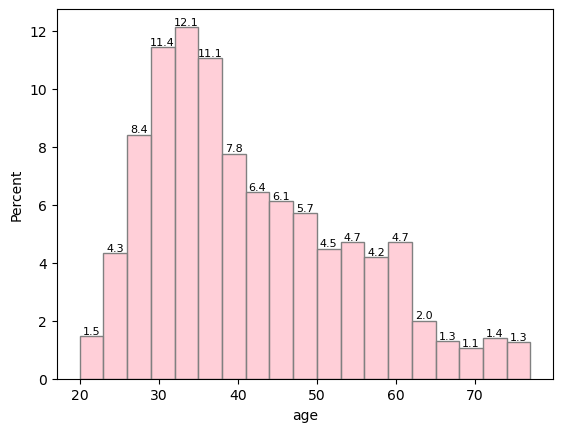

In [37]:
ax =sns.histplot(data=deposito, x='age', bins = range(20,80,3), color='pink', edgecolor = 'gray', stat = 'percent')
ax.bar_label(ax.containers[0], labels=[f"{v:.1f}" for v in ax.containers[0].datavalues], fontsize = 8);

##### VARIABLE JOB

In [98]:
deposito_cuenteo = deposito['job'].value_counts()
order = deposito_cuenteo.index

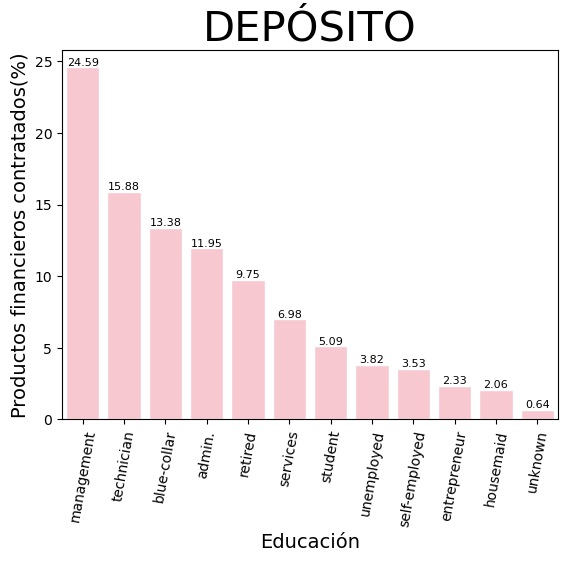

In [100]:
ax =sns.countplot(data=deposito, x='job', order=order, color='pink', edgecolor = 'white', stat = 'percent')
ax.bar_label(ax.containers[0], labels=[f"{v:.2f}" for v in ax.containers[0].datavalues], fontsize = 8)
plt.xticks(rotation = 80)
plt.title('DEPÓSITO', fontsize=30)
plt.xlabel('Educación', fontsize=14)
plt.ylabel('Productos financieros contratados(%)', fontsize=14);

##### VARIABLE ESTADO CIVIL

In [102]:
deposito_cuenteo = deposito['marital'].value_counts()
order = deposito_cuenteo.index

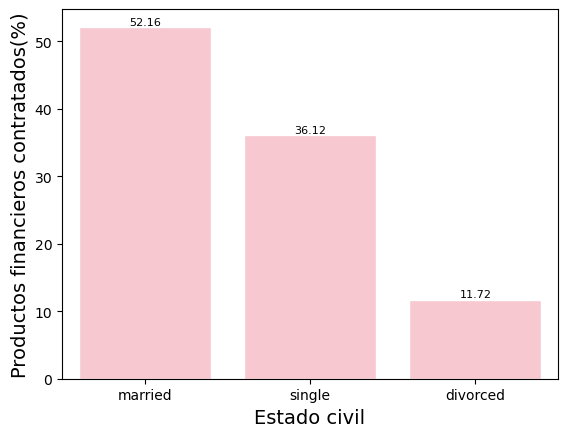

In [103]:
ax =sns.countplot(data=deposito, x='marital', order = order, color='pink', edgecolor = 'white', stat = 'percent')
ax.bar_label(ax.containers[0], labels=[f"{v:.2f}" for v in ax.containers[0].datavalues], fontsize = 8)
plt.xlabel('Estado civil', fontsize=14)
plt.ylabel('Productos financieros contratados(%)', fontsize=14);

##### VARIABLE EDUCACION

In [105]:
deposito_cuenteo = deposito['education'].value_counts()
order = deposito_cuenteo.index

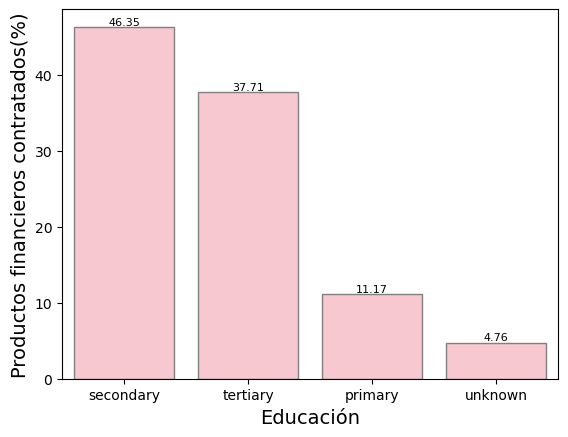

In [106]:
ax =sns.countplot(data=deposito, x='education', order=order, color='pink', edgecolor = 'gray',stat = 'percent')
ax.bar_label(ax.containers[0], labels=[f"{v:.2f}" for v in ax.containers[0].datavalues], fontsize = 8)
plt.xlabel('Educación', fontsize=14)
plt.ylabel('Productos financieros contratados(%)', fontsize=14);

#### VISUALIZACION JUNTO

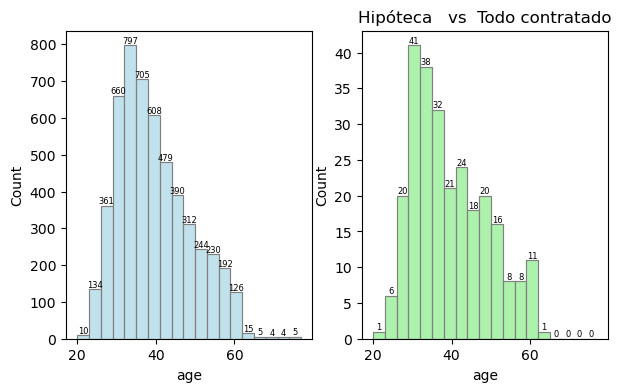

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7, 4))
sns.histplot(data=hipoteca, x='age', ax=ax1, bins = range(20,80,3), color='lightblue', edgecolor = 'gray')
ax1.bar_label(ax1.containers[0], fontsize = 6)
sns.histplot(data=clientes_todo_contratado, x='age', ax=ax2, bins = range(20,80,3), color='lightgreen', edgecolor = 'gray')
ax2.bar_label(ax2.containers[0], fontsize = 6)
plt.title('Hipóteca   vs  Todo contratado');

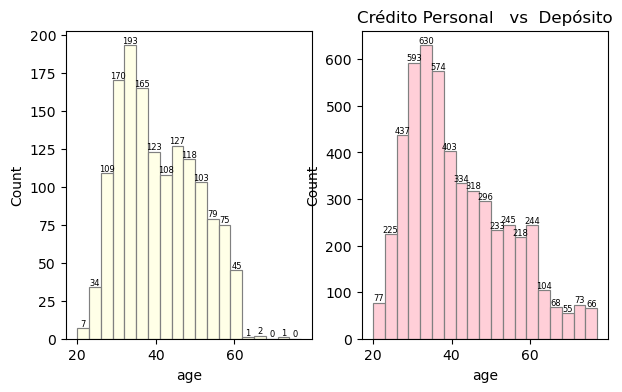

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7, 4))
sns.histplot(data=credito, x='age', ax=ax1, bins = range(20,80,3), color='lightyellow', edgecolor = 'gray')
ax1.bar_label(ax1.containers[0], fontsize = 6)

sns.histplot(data=deposito, x='age', ax=ax2, bins = range(20,80,3), color='pink', edgecolor = 'gray')
ax2.bar_label(ax2.containers[0], fontsize = 6)
plt.title('Crédito Personal   vs  Depósito');

##### VARIABLE EDAD EN UNICO GRAFICO Y TODOS LOS PRODUCTOS(INCLUYE UNA VARIABLE CON TODOS LOS PRODUCTOS CONTRATADOS)

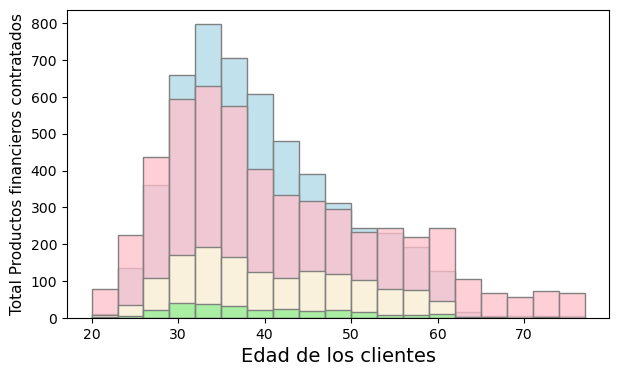

In [109]:
fig, ax = plt.subplots(1,1, figsize=(7, 4))
sns.histplot(data=hipoteca, x='age', bins = range(20,80,3), color='lightblue', edgecolor = 'gray')
sns.histplot(data=deposito, x='age', bins = range(20,80,3), color='pink', edgecolor = 'gray')
sns.histplot(data=credito, x='age', bins = range(20,80,3), color='lightyellow', edgecolor = 'gray')
sns.histplot(data=clientes_todo_contratado, x='age', bins = range(20,80,3), color='lightgreen', edgecolor = 'gray')
plt.xlabel('Edad de los clientes', fontsize=14)
plt.ylabel('Total Productos financieros contratados', fontsize=11)
plt.show()

##### VARIABLE EDAD EN UNICO GRAFICO Y TODOS LOS PRODUCTOS

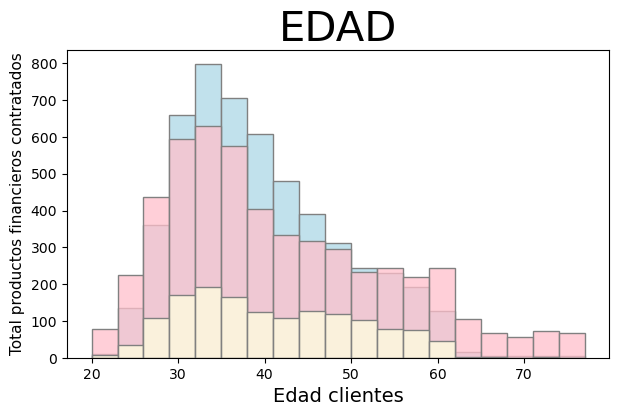

In [111]:
# HAGO EL MISMO GRÁFICO PERO SOLO CON LOS TRES PRODCUTOS QUE OFRECEMOS
fig, ax = plt.subplots(1,1, figsize=(7, 4))
sns.histplot(data=hipoteca, x='age', bins = range(20,80,3), color='lightblue', edgecolor = 'gray')
sns.histplot(data=deposito, x='age', bins = range(20,80,3), color='pink', edgecolor = 'gray')
sns.histplot(data=credito, x='age', bins = range(20,80,3), color='lightyellow', edgecolor = 'gray')
plt.ylabel('Total productos financieros contratados', fontsize=11)
plt.xlabel('Edad clientes', fontsize=14)
plt.title('EDAD', fontsize=30)
plt.show()

#### PRUEBO DE NUEVO. voy a concatenar los campos de las variables categóricas demográficas y concatenar los valores de los productos financieros, una vez haya sustituido los 0 y 1 por su nombre de producto.

In [48]:
cliente['housing'] = cliente['housing'].replace({1:'hipoteca'})
cliente['loan'] = cliente['loan'].replace({1:'credito'})
cliente['deposit'] = cliente['deposit'].replace({1:'deposit'})
cliente

C:\Users\34622\AppData\Local\Temp\ipykernel_15628\2221701948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['housing'] = cliente['housing'].replace({1:'hipoteca'})
C:\Users\34622\AppData\Local\Temp\ipykernel_15628\2221701948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['loan'] = cliente['loan'].replace({1:'credito'})
C:\Users\34622\AppData\Local\Temp\ipykernel_15628\2221701948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,id,age,job,marital,education,is_in_default,housing,loan,deposit
0,1,59.0,admin.,married,secondary,0,hipoteca,0,deposit
1,2,59.0,admin.,married,secondary,0,hipoteca,0,deposit
2,3,56.0,admin.,married,secondary,0,0,0,deposit
3,4,41.0,technician,married,secondary,0,hipoteca,0,deposit
4,5,55.0,services,married,secondary,0,hipoteca,0,deposit
...,...,...,...,...,...,...,...,...,...
11158,11159,33.0,blue-collar,single,primary,0,hipoteca,0,0
11159,11160,39.0,services,married,secondary,0,0,0,0
11160,11161,32.0,technician,single,secondary,0,0,0,0
11161,11162,43.0,technician,married,secondary,0,0,credito,0


In [49]:
cliente['housing'] = cliente['housing'].astype(str)
cliente['loan'] = cliente['loan'].astype(str)
cliente['deposit'] = cliente['deposit'].astype(str)

C:\Users\34622\AppData\Local\Temp\ipykernel_15628\318873528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['housing'] = cliente['housing'].astype(str)
C:\Users\34622\AppData\Local\Temp\ipykernel_15628\318873528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['loan'] = cliente['loan'].astype(str)
C:\Users\34622\AppData\Local\Temp\ipykernel_15628\318873528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [50]:
cliente['perfil'] = cliente['job'] + '_' + cliente['education'] + '_' + cliente['marital']
cliente['producto'] = cliente['housing'] + '_' + cliente['loan'] + '_' + cliente['deposit']
cliente

C:\Users\34622\AppData\Local\Temp\ipykernel_15628\3859738216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['perfil'] = cliente['job'] + '_' + cliente['education'] + '_' + cliente['marital']
C:\Users\34622\AppData\Local\Temp\ipykernel_15628\3859738216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['producto'] = cliente['housing'] + '_' + cliente['loan'] + '_' + cliente['deposit']


,id,age,job,marital,education,is_in_default,housing,loan,deposit,perfil,producto
0,1,59.0,admin.,married,secondary,0,hipoteca,0,deposit,admin._secondary_married,hipoteca_0_deposit
1,2,59.0,admin.,married,secondary,0,hipoteca,0,deposit,admin._secondary_married,hipoteca_0_deposit
2,3,56.0,admin.,married,secondary,0,0,0,deposit,admin._secondary_married,0_0_deposit
3,4,41.0,technician,married,secondary,0,hipoteca,0,deposit,technician_secondary_married,hipoteca_0_deposit
4,5,55.0,services,married,secondary,0,hipoteca,0,deposit,services_secondary_married,hipoteca_0_deposit
...,...,...,...,...,...,...,...,...,...,...,...
11158,11159,33.0,blue-collar,single,primary,0,hipoteca,0,0,blue-collar_primary_single,hipoteca_0_0
11159,11160,39.0,services,married,secondary,0,0,0,0,services_secondary_married,0_0_0
11160,11161,32.0,technician,single,secondary,0,0,0,0,technician_secondary_single,0_0_0
11161,11162,43.0,technician,married,secondary,0,0,credito,0,technician_secondary_married,0_credito_0


In [51]:
cliente_selec = cliente[['id', 'perfil', 'producto']]
cliente_selec = cliente_selec[cliente_selec['producto'] != '0_0_0']
cliente_selec['producto'] = cliente_selec['producto'].str.replace('0','', regex=False).str.strip('_')
cliente_selec

,id,perfil,producto
0,1,admin._secondary_married,hipoteca__deposit
1,2,admin._secondary_married,hipoteca__deposit
2,3,admin._secondary_married,deposit
3,4,technician_secondary_married,hipoteca__deposit
4,5,services_secondary_married,hipoteca__deposit
...,...,...,...
11155,11156,technician_tertiary_married,hipoteca_credito
11156,11157,blue-collar_secondary_married,hipoteca_credito
11157,11158,blue-collar_secondary_single,hipoteca
11158,11159,blue-collar_primary_single,hipoteca


#### HEATMAP: VARIABLES DEMOGRAFICAS Y TOTAL PRODUCTOS CONTRATADOS

In [52]:
df2 = cliente_selec.groupby(['perfil', 'producto'])['id'].count().reset_index()
df2 = df2.sort_values('id', ascending=False, ignore_index = True).reset_index().head(43)
df2
## selecciono los registros que están por encima de 50 clientes han contratado esos productos
## el total son 557 registros 

,index,perfil,producto,id
0,0,management_tertiary_married,deposit,374
1,1,management_tertiary_single,deposit,293
2,2,blue-collar_secondary_married,hipoteca,281
3,3,management_tertiary_married,hipoteca,256
4,4,blue-collar_primary_married,hipoteca,216
5,5,technician_secondary_married,hipoteca,160
6,6,admin._secondary_married,hipoteca,157
7,7,services_secondary_married,hipoteca,157
8,8,blue-collar_secondary_married,hipoteca__deposit,148
9,9,management_tertiary_married,hipoteca__deposit,143


In [53]:
cuenteo = df2.pivot_table(index='perfil', 
                            columns='producto', 
                            values='id', 
                            aggfunc='sum', 
                            fill_value=0)

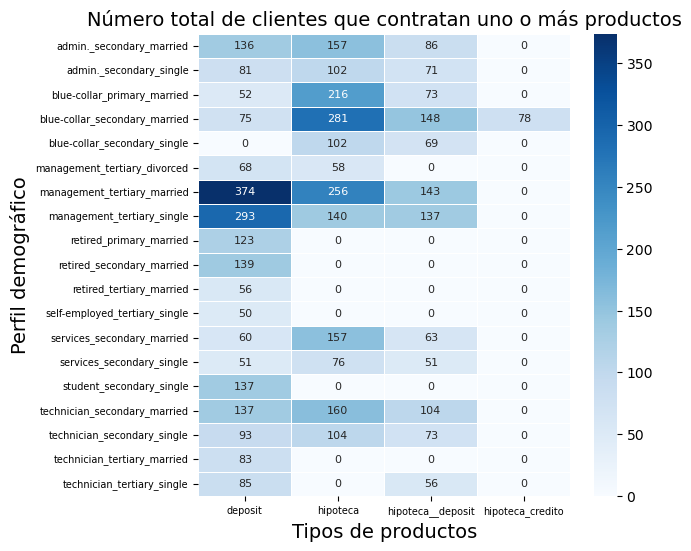

In [112]:
plt.figure(figsize=(6, 6))  # Ajusta el tamaño del gráfico
sns.heatmap(cuenteo, annot=True, cmap="Blues", linewidths=.5, fmt="d",annot_kws={"size": 8})
plt.tick_params(axis='both', which='major', labelsize=7)
plt.xticks(rotation = 0)
plt.title('Número total de clientes que contratan uno o más productos', fontsize=14)
plt.ylabel('Perfil demográfico', fontsize=14)
plt.xlabel('Tipos de productos', fontsize=14)
plt.show()